In [79]:
library(rpart)
library(pROC)

# Define the directory structure using file.path()
my_dir <- file.path("C:/Users/GPEL_HPENVY/Desktop/Project_Predictive_Analytics_R")

# Check if the directory exists
if (dir.exists(my_dir)) {
  # Set the working directory
  setwd(my_dir)
  cat("Working directory set to:", getwd(), "\n")
} else {
  cat("Directory does not exist:", my_dir, "\n")
}

Working directory set to: C:/Users/GPEL_HPENVY/Desktop/Project_Predictive_Analytics_R 


In [80]:
# set file path
# read csv file
#setwd('H:/GPEL_HPENVY/Documents/UNSW/07_ZZBU6511/Assessment3/')
employees <- read.csv(file = 'employees2.csv')

# Modify the column names to remove unwanted characters (assuming the problematic column is named "ï..Age")
colnames(employees) <- gsub("ï\\.{2}", "", colnames(employees))

In [81]:
# Inspect file
head(employees)


Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HighPerformance
26,No,Travel_Frequently,Research & Development,10,3,3,Male,4,Laboratory Technician,...,1,1,8,3,3,7,7,7,7,0
33,No,Travel_Rarely,Research & Development,13,5,4,Male,3,Healthcare Representative,...,1,0,14,6,3,0,0,0,0,0
59,No,Travel_Rarely,Research & Development,5,3,3,Female,4,Laboratory Technician,...,1,3,12,3,2,1,0,0,0,1
42,No,Travel_Rarely,Research & Development,21,3,2,Male,4,Healthcare Representative,...,3,2,10,2,2,0,0,0,0,0
24,No,Travel_Rarely,Research & Development,27,1,4,Female,2,Manufacturing Director,...,2,2,5,6,3,4,2,3,2,0
29,No,Travel_Rarely,Research & Development,37,2,3,Male,4,Research Scientist,...,3,1,10,3,3,10,7,0,7,1


In [82]:
# Add new binary variables to the employees data frame
employees$Is.Attrition = ifelse(employees$Attrition == "Yes", 1, 0)
employees$Over18 <- NULL  # Don't include Over18 since all response is Yes.

In [83]:
set.seed(57)
rows <- sample(nrow(employees), 0.8*nrow(employees))
training <- employees[rows, ]
testing <- employees[-rows, ]

In [84]:
logmod4 <- glm(
  formula = Is.Attrition ~ BusinessTravel + OverTime + JobRole +
    DistanceFromHome + JobSatisfaction + EnvironmentSatisfaction + JobInvolvement + 
    NumCompaniesWorked + WorkLifeBalance,
  data = training,
  family = binomial()
)
logmod5 <- glm(
  formula = Is.Attrition ~ BusinessTravel + OverTime + Gender + MaritalStatus +
    DistanceFromHome + JobSatisfaction + EnvironmentSatisfaction + JobInvolvement + 
    JobRole + NumCompaniesWorked + TotalWorkingYears + WorkLifeBalance,
  data = training,
  family = binomial()
)

In [85]:
# Get the probabilities on training and testing
training$logprob4 <- predict(
  logmod4, newdata=training, type="response"
  )
testing$logprob4 <- predict( 
  logmod4, newdata=testing, type="response"
  )
training$logprob5 <- predict( 
  logmod5, newdata=training, type="response"
  )
testing$logprob5 <- predict( 
  logmod5, newdata=testing, type="response"
  )

In [86]:
# Get the ROC curves on training and testing
training.logroc4 <- roc(Is.Attrition ~ logprob4, data=training, plot=FALSE, quiet=TRUE
)
testing.logroc4 <- roc(Is.Attrition ~ logprob4, data=testing, plot=FALSE, quiet=TRUE
)
training.logroc5 <- roc(Is.Attrition ~ logprob5, data=training, plot=FALSE, quiet=TRUE
)
testing.logroc5 <- roc(Is.Attrition ~ logprob5, data=testing, plot=FALSE, quiet=TRUE
)

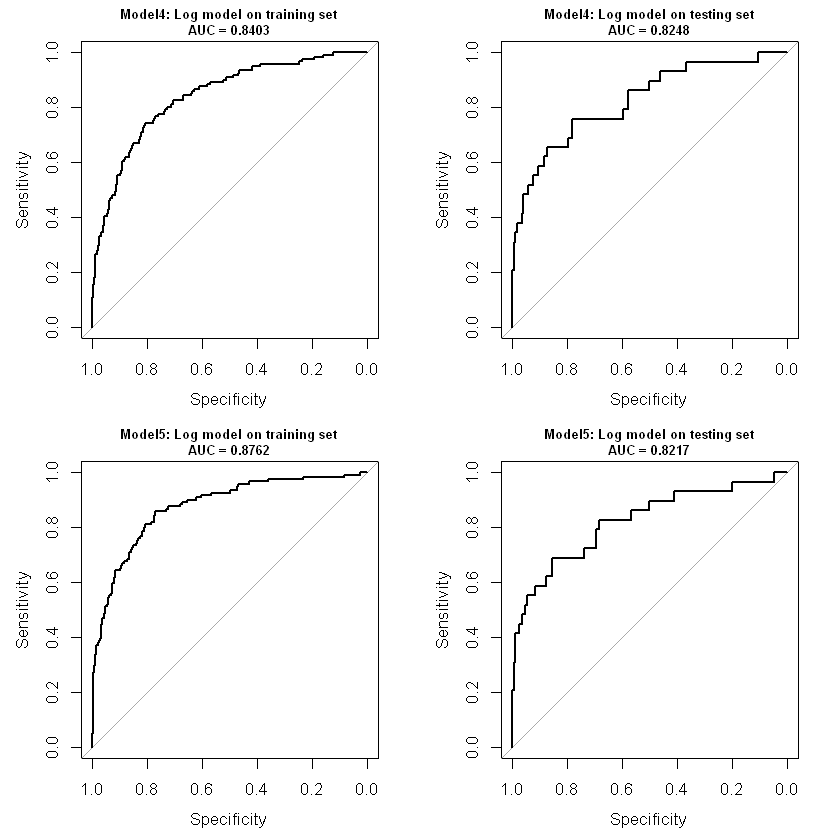

In [87]:
# Plot the ROC curves and show AUC
par(mfrow=c(2, 2), cex.main=0.8)
plot(
  training.logroc4,
  main=paste("Model4: Log model on training set\nAUC =", round(training.logroc4$auc, digits=4))
)
plot(
  testing.logroc4,
  main=paste("Model4: Log model on testing set\nAUC =", round(testing.logroc4$auc, digits=4))
)
plot(
  training.logroc5,
  main=paste("Model5: Log model on training set\nAUC =", round(training.logroc5$auc, digits=4))
)
plot(
  testing.logroc5,
  main=paste("Model5: Log model on testing set\nAUC =", round(testing.logroc5$auc, digits=4))
)